<a href="https://colab.research.google.com/github/ManuelDizen/SIA/blob/main/Ej_Obligatorio%202/Ej_2_Componentes_Principales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 2 - Componentes Principales
### Consigna: "Utilizar una librería para calcular las componentes principales (del archivo _europe.csv_). Interpretar la primera componente."

### Librerias y fuentes de información utilizadas

In [ ]:
# Imports
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

# Fuentes de información para procesamiento de componentes principales:
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
# https://www.kindsonthegenius.com/principal-components-analysispca-in-python-step-by-step/


### Procesamiento de información

In [ ]:
url = 'https://raw.githubusercontent.com/ManuelDizen/SIA/main/TP4%20-%20M%C3%A9todos%20de%20Aprendizaje%20NO%20supervisado/europe.csv'
df = pd.read_csv(url)

features = ['Area', 'GDP', 'Inflation', 'Life.expect', 'Military', 'Pop.growth', 'Unemployment']

x = df.loc[:, features].values
y = df.loc[:,['Country']].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=0.95, svd_solver='full')
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
finalDf = pd.concat([principalDf, df[['Country']]], axis = 1)
mainComponent = pd.DataFrame(data=principalComponents[:, 0], index=y).T

#print(principalComponents)
print(finalDf)
print(f'\nVarianza: {pca.explained_variance_ratio_}' + "\n")
print(f'Varianza acumulada: {pca.explained_variance_ratio_.cumsum()}\n')
print(f'Autovectores: \nCP1: {pca.components_[0]} \nCP2: {pca.components_[1]}\n')
print(f'\nVariable  |  Coeficiente en CP1  | Coeficiente en CP2  \n---------------------------------------')
for i in range(0, len(pca.components_[0])):
  print(f'{features[i]} | {pca.components_[0][i]} | {pca.components_[1][i]}')
print(f'\nValores de componente principal para cada país:\n{mainComponent}')


           0         1         2         3         4         Country
0  -1.081748 -1.270051 -0.514803 -0.413907  0.001251         Austria
1  -0.681094 -0.416041 -0.687292 -0.283364  0.273518         Belgium
2   2.609879  0.269638 -0.623031 -1.331941  0.001946        Bulgaria
3   1.270149  1.901427 -0.831925  0.371907 -0.377894         Croatia
4  -0.167209 -0.131943 -1.001979 -0.263449 -1.047409  Czech Republic
5  -0.955191 -0.409628 -0.732314 -0.391339  0.027888         Denmark
6   2.487735 -0.085779 -0.987538 -0.303984  0.555597         Estonia
7  -0.210563 -0.033717  1.174438 -0.614491 -0.145780         Finland
8  -0.592394 -0.471832  0.992255 -0.843702 -0.981331         Germany
9   1.000472  3.406849  0.738084 -0.793175  1.068531          Greece
10  1.396898 -0.034231 -0.695239 -0.097312  0.050388         Hungary
11 -1.583720 -1.477264 -0.306748  1.251670  0.167241         Iceland
12 -1.808918  0.521808 -0.301615  1.829776  0.372668         Ireland
13 -0.853224  0.327799  1.114486 -

# **Visualización de la información procesada**
## Varianza acumulada

[1 2 3 4 5]
[0.46102367 0.16958906 0.15188436 0.11005085 0.06540695]




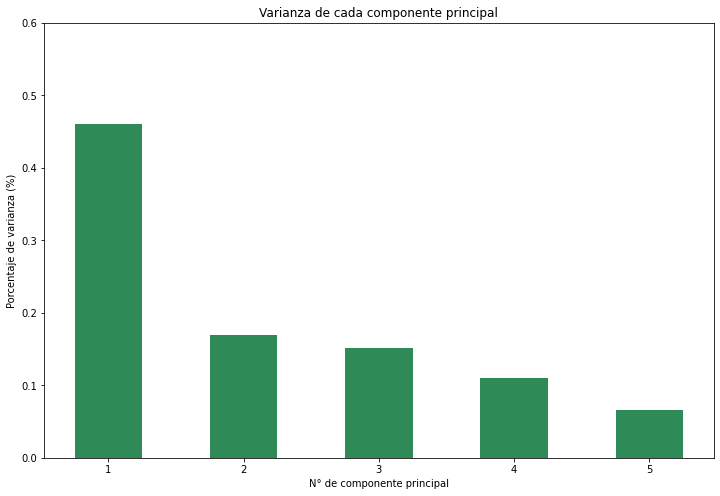

In [ ]:
indexes = np.arange(pca.n_components_)
indexes = np.append(indexes, 5)
indexes = indexes[1:]
values = pca.explained_variance_ratio_
print(indexes)
print(pca.explained_variance_ratio_)
print('\n')

fig = plt.figure(figsize = (12,8))
plt.bar(indexes, values, color ='seagreen',
        width = 0.5)
aux = plt.gca()
aux.set_ylim(0,0.6)
plt.xlabel("N° de componente principal")
plt.ylabel("Porcentaje de varianza (%)")
plt.title("Varianza de cada componente principal")
plt.show()

[1 2 3 4 5]
[0.46102367 0.63061273 0.78249709 0.89254794 0.95795489]




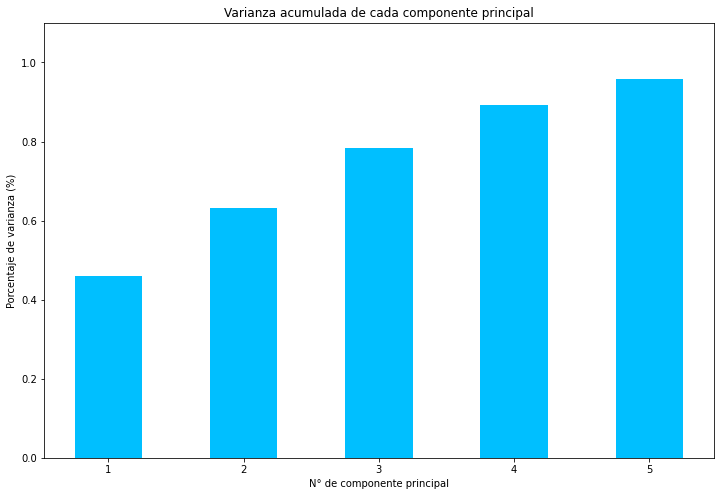

In [ ]:
ñindexes = np.arange(pca.n_components_)
indexes = np.append(indexes, 5)
indexes = indexes[1:]
values = pca.explained_variance_ratio_.cumsum()
print(indexes)
print(pca.explained_variance_ratio_.cumsum())
print('\n')

fig = plt.figure(figsize = (12,8))
plt.bar(indexes, values, color ='deepskyblue',
        width = 0.5)
aux = plt.gca()
aux.set_ylim(0,1.1)
plt.xlabel("N° de componente principal")
plt.ylabel("Porcentaje de varianza (%)")
plt.title("Varianza acumulada de cada componente principal")
plt.show()

### Valores de la componente principal para cada país

Country  |  Value of main component
Austria | -1.0817476612095909
Belgium | -0.6810940686338438
Bulgaria | 2.6098788164204785
Croatia | 1.2701488485858339
Czech Republic | -0.16720949379051178
Denmark | -0.9551907971097198
Estonia | 2.487735218104109
Finland | -0.21056315636344047
Germany | -0.5923936529244829
Greece | 1.0004719569396414
Hungary | 1.3968983127833714
Iceland | -1.5837197024631129
Ireland | -1.8089176109392011
Italy | -0.8532239623948381
Latvia | 2.3060594085931676
Lithuania | 1.5300999099527088
Luxembourg | -3.4784349567046386
Netherlands | -1.8400534050753623
Norway | -2.1065108336056695
Poland | 1.4717738276291152
Portugal | 0.5264933349515382
Slovakia | 0.7829659710814719
Slovenia | 0.06754337538258308
Spain | -0.16376695684389914
Sweden | -0.8851053096517604
Switzerland | -3.281586128815993
Ukraine | 4.580268066769381
United Kingdom | -0.34081935066733765




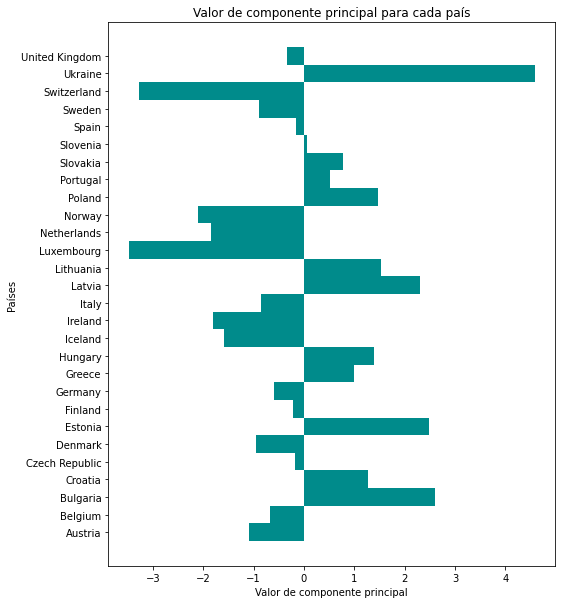

In [8]:
labels = y[:,0]
values = mainComponent.values[0]
print('Country  |  Value of main component')
for i in range(0, len(labels)):
  print(f'{labels[i]} | {values[i]}')
print('\n')
fig = plt.figure(figsize=(8,10))
plt.barh(labels, values, color = 'darkcyan', height=1)
aux = plt.gca()
#aux.set_ylim(-4,5)
plt.ylabel("Países")
plt.xlabel("Valor de componente principal")
plt.title("Valor de componente principal para cada país")
plt.show()


### Similitud entre países en base a 1er y 2da componente

[-1.27005118 -0.41604077  0.269638    1.90142683 -0.13194348 -0.40962793
 -0.08577888 -0.03371734 -0.47183193  3.40684913 -0.03423106 -1.4772635
  0.52180763  0.32779905 -0.67534839 -0.19499692 -1.07628698 -0.05722934
 -0.14396302  0.07298508  1.03477405 -0.17225978  0.79767206  1.152066
 -0.40288073 -0.10822672 -2.82904199  0.5057021 ]
Austria | -1.0817476612095909 | -1.2700511753306516
Belgium | -0.6810940686338438 | -0.4160407703581628
Bulgaria | 2.6098788164204785 | 0.26963800477755556
Croatia | 1.2701488485858339 | 1.9014268255104634
Czech Republic | -0.16720949379051178 | -0.13194347703970907
Denmark | -0.9551907971097198 | -0.40962793443305684
Estonia | 2.487735218104109 | -0.08577888146964252
Finland | -0.21056315636344047 | -0.03371734441503809
Germany | -0.5923936529244829 | -0.4718319333243313
Greece | 1.0004719569396414 | 3.406849126260231
Hungary | 1.3968983127833714 | -0.034231060419029236
Iceland | -1.5837197024631129 | -1.477263500507381
Ireland | -1.8089176109392011 | 

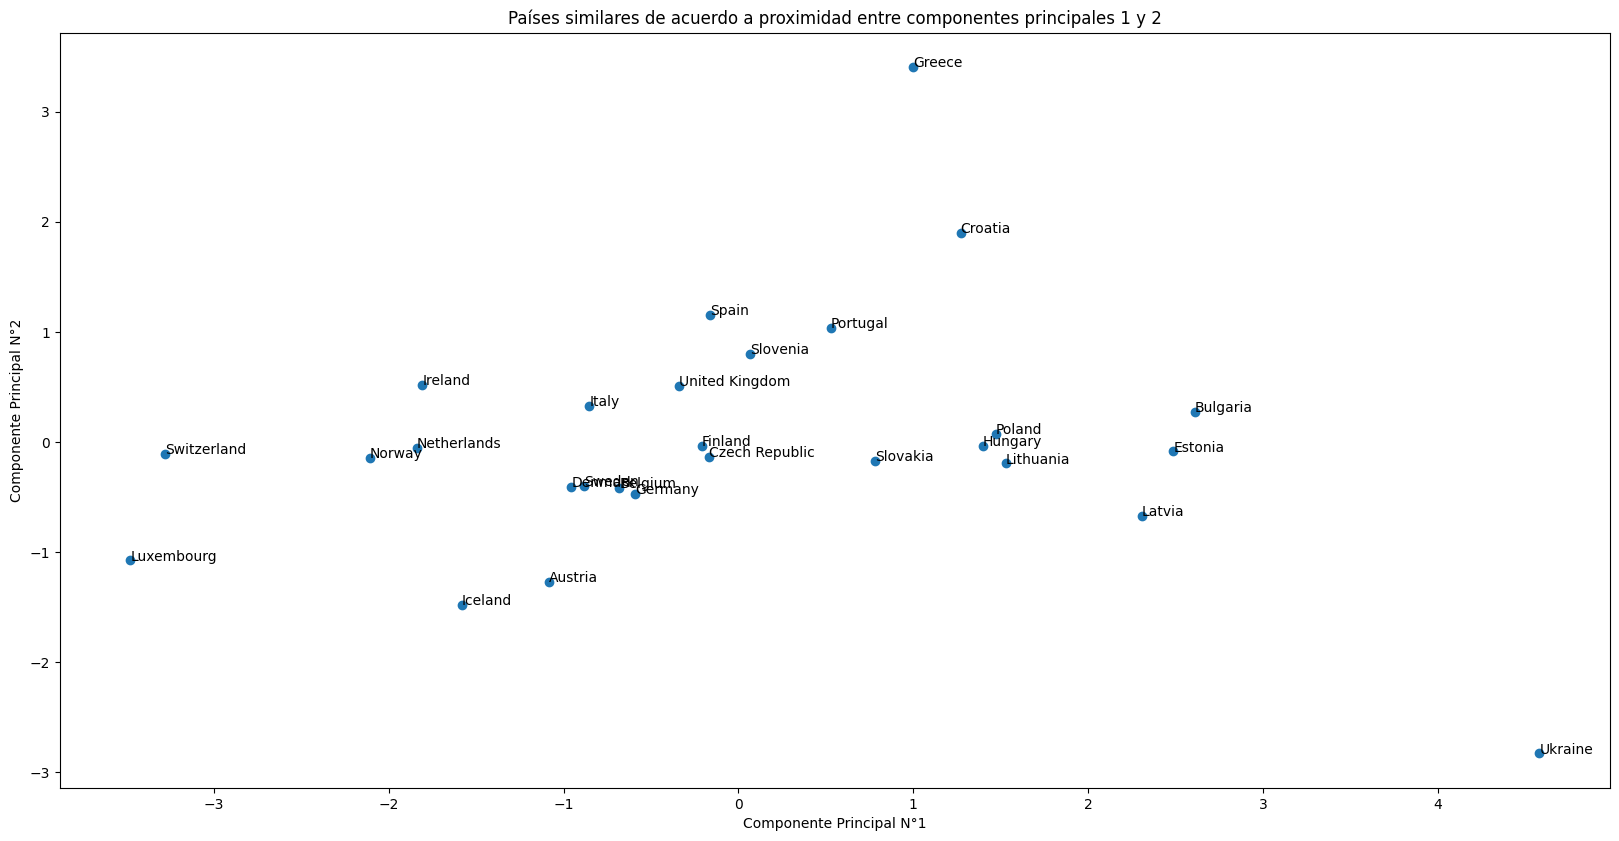

In [ ]:
values2 = pd.DataFrame(data=principalComponents[:, 1], index=y).T.values[0]
print(values2)
for i in range(0, len(labels)):
  print(f'{labels[i]} | {values[i]} | {values2[i]}')

plt.figure(num=None, figsize=(20,10), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(values, values2, label=labels)
plt.xlabel('Componente Principal N°1')
plt.ylabel('Componente Principal N°2')
plt.title('Países similares de acuerdo a proximidad entre componentes principales 1 y 2')
for i, label in enumerate(labels):
    plt.annotate(label, (values[i], values2[i]))
plt.show()

### Integrantes:

- [De Simone, Franco](https://github.com/desimonef) -  61100

- [Dizenhaus, Manuel](https://github.com/ManuelDizen) -  61101

- [Cornidez, Milagros](https://github.com/mcornidez) -  61432